In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

import os
import pandas as pd
import shutil
import random
from glob import glob
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/lisa.zip'
extract_dir = '/content/lisa_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [ ]:
import pandas as pd

# Choose one annotation file to inspect
csv_path = "/content/lisa_dataset/Annotations/Annotations/dayTrain/dayClip4/frameAnnotationsBOX.csv"

# Try auto-detecting separator
with open(csv_path, 'r') as f:
    for i in range(5):
        print(f.readline())


Filename;Annotation tag;Upper left corner X;Upper left corner Y;Lower right corner X;Lower right corner Y;Origin file;Origin frame number;Origin track;Origin track frame number

dayTraining/dayClip4--00000.jpg;go;404;372;416;392;dayTraining/dayClip4/dayClip4Shutter0.000800-Gain-0.mp4;0;dayTraining/dayClip4/dayClip4Shutter0.000800-Gain-0.mp4;0

dayTraining/dayClip4--00000.jpg;go;642;319;657;344;dayTraining/dayClip4/dayClip4Shutter0.000800-Gain-0.mp4;0;dayTraining/dayClip4/dayClip4Shutter0.000800-Gain-0.mp4;0

dayTraining/dayClip4--00000.jpg;go;716;323;728;348;dayTraining/dayClip4/dayClip4Shutter0.000800-Gain-0.mp4;0;dayTraining/dayClip4/dayClip4Shutter0.000800-Gain-0.mp4;0

dayTraining/dayClip4--00000.jpg;go;826;382;844;407;dayTraining/dayClip4/dayClip4Shutter0.000800-Gain-0.mp4;0;dayTraining/dayClip4/dayClip4Shutter0.000800-Gain-0.mp4;0



In [ ]:
df = pd.read_csv(csv_path, sep=';')
print(df.columns)
print(df.head())


Index(['Filename', 'Annotation tag', 'Upper left corner X',
       'Upper left corner Y', 'Lower right corner X', 'Lower right corner Y',
       'Origin file', 'Origin frame number', 'Origin track',
       'Origin track frame number'],
      dtype='object')
                          Filename Annotation tag  Upper left corner X  \
0  dayTraining/dayClip4--00000.jpg             go                  404   
1  dayTraining/dayClip4--00000.jpg             go                  642   
2  dayTraining/dayClip4--00000.jpg             go                  716   
3  dayTraining/dayClip4--00000.jpg             go                  826   
4  dayTraining/dayClip4--00001.jpg             go                  830   

   Upper left corner Y  Lower right corner X  Lower right corner Y  \
0                  372                   416                   392   
1                  319                   657                   344   
2                  323                   728                   348   
3                

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
import os
import pandas as pd
import shutil
import random
from glob import glob
from tqdm import tqdm

# Configs
LISA_ROOT = '/content/lisa_dataset'
YOLO_ROOT = '/content/lisa_yolo'
ANNOTATIONS_DIR = os.path.join(LISA_ROOT, 'Annotations')
IMAGES_DIR = os.path.join(YOLO_ROOT, 'images')
LABELS_DIR = os.path.join(YOLO_ROOT, 'labels')
SPLIT_RATIO = 0.8  # 80% train, 20% val

# Create output folders
for split in ['train', 'val']:
    os.makedirs(os.path.join(IMAGES_DIR, split), exist_ok=True)
    os.makedirs(os.path.join(LABELS_DIR, split), exist_ok=True)

# Step 1: Gather all annotation CSV files
csv_files = glob(f'{ANNOTATIONS_DIR}/**/*.csv', recursive=True)
print(f"✅ Found {len(csv_files)} annotation files.")

# Step 2: Collect all real image paths from LISA
real_images = glob(f'{LISA_ROOT}/**/*.jpg', recursive=True)
filename_to_fullpath = {os.path.basename(path): path for path in real_images}
print(f"✅ Found {len(real_images)} real images.")

# Step 3: Parse annotations and collect samples
samples = []
class_names = set()

for csv_file in tqdm(csv_files, desc="🔍 Parsing annotations"):
    df = pd.read_csv(csv_file, sep=';')
    for _, row in df.iterrows():
        filename = os.path.basename(row['Filename'])
        full_path = filename_to_fullpath.get(filename)
        if not full_path:
            continue  # Skip if image is missing

        class_name = row['Annotation tag']
        x1 = int(row['Upper left corner X'])
        y1 = int(row['Upper left corner Y'])
        x2 = int(row['Lower right corner X'])
        y2 = int(row['Lower right corner Y'])
        class_names.add(class_name)

        samples.append({
            'img_name': filename,
            'img_path': full_path,
            'class_name': class_name,
            'bbox': [x1, y1, x2, y2]
        })

if not samples:
    raise RuntimeError("❌ No matching annotations and images found.")

print(f"🧩 Found {len(samples)} annotations across {len(class_names)} classes: {sorted(class_names)}")

# Step 4: Map class names to indices
class_to_idx = {name: idx for idx, name in enumerate(sorted(class_names))}

# Step 5: Group samples by image for splitting
from collections import defaultdict
grouped = defaultdict(list)
for sample in samples:
    grouped[sample['img_path']].append(sample)

# Step 6: Split into train/val
img_paths = list(grouped.keys())
random.shuffle(img_paths)
subset_ratio = 0.3  # Use 30% of data
subset_size = int(len(img_paths) * subset_ratio)

split_idx = int(subset_size * SPLIT_RATIO)
train_imgs = img_paths[:subset_size][:split_idx]
val_imgs = img_paths[:subset_size][split_idx:]

print(f"📦 Split into {len(train_imgs)} train and {len(val_imgs)} val images")

# Step 7: Save YOLO annotations and copy images
def convert_and_save(split_name, split_imgs):
    for img_path in tqdm(split_imgs, desc=f"✍️ Processing {split_name}"):
        label_path = os.path.join(LABELS_DIR, split_name, os.path.splitext(os.path.basename(img_path))[0] + '.txt')
        img_dst = os.path.join(IMAGES_DIR, split_name, os.path.basename(img_path))

        # Copy image
        shutil.copyfile(img_path, img_dst)

        # Get image size
        import cv2
        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        # Write label file
        with open(label_path, 'w') as f:
            for ann in grouped[img_path]:
                x1, y1, x2, y2 = ann['bbox']
                cx = (x1 + x2) / 2 / w
                cy = (y1 + y2) / 2 / h
                bw = (x2 - x1) / w
                bh = (y2 - y1) / h
                cls = class_to_idx[ann['class_name']]
                f.write(f"{cls} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}\n")

convert_and_save('train', train_imgs)
convert_and_save('val', val_imgs)

# Step 8: Create data.yaml
with open(os.path.join(YOLO_ROOT, 'data.yaml'), 'w') as f:
    f.write(f"path: {YOLO_ROOT}\n")
    f.write(f"train: images/train\n")
    f.write(f"val: images/val\n")
    f.write(f"nc: {len(class_names)}\n")
    f.write(f"names: {sorted(class_names)}\n")

print("\n✅ Conversion complete! YOLOv8 dataset is ready.")


✅ Found 44 annotation files.
✅ Found 44075 real images.


🔍 Parsing annotations: 100%|██████████| 44/44 [00:20<00:00,  2.20it/s]


🧩 Found 226353 annotations across 7 classes: ['go', 'goForward', 'goLeft', 'stop', 'stopLeft', 'warning', 'warningLeft']
📦 Split into 8825 train and 2207 val images


✍️ Processing val: 100%|██████████| 2207/2207 [00:19<00:00, 114.69it/s]


✅ Conversion complete! YOLOv8 dataset is ready.


In [ ]:
import shutil

# Zip the final YOLOv8 dataset folder
shutil.make_archive("/content/drive/MyDrive/lisa_yolo_ready", 'zip', "/content/lisa_yolo")
print("✅ YOLO dataset zipped and saved to Drive.")


✅ YOLO dataset zipped and saved to Drive.


In [ ]:
!yolo detect train data=/content/lisa_yolo/data.yaml model=yolov8n.pt epochs=15 imgsz=640


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 91.1MB/s]
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/lisa_yolo/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, 

In [ ]:
# Backup the best trained model to Drive
drive_model_dir = "/content/drive/MyDrive/yolov8_lisa_models"
os.makedirs(drive_model_dir, exist_ok=True)

# Copy the best model
shutil.copy("/content/runs/detect/train/weights/best.pt", os.path.join(drive_model_dir, "best_lisa.pt"))
print("✅ Trained YOLOv8 model saved to Google Drive.")


✅ Trained YOLOv8 model saved to Google Drive.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/1 /content/drive/MyDrive/dayClip11--00334.jpg: 480x640 6 gos, 327.0ms
Speed: 17.3ms preprocess, 327.0ms inference, 29.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


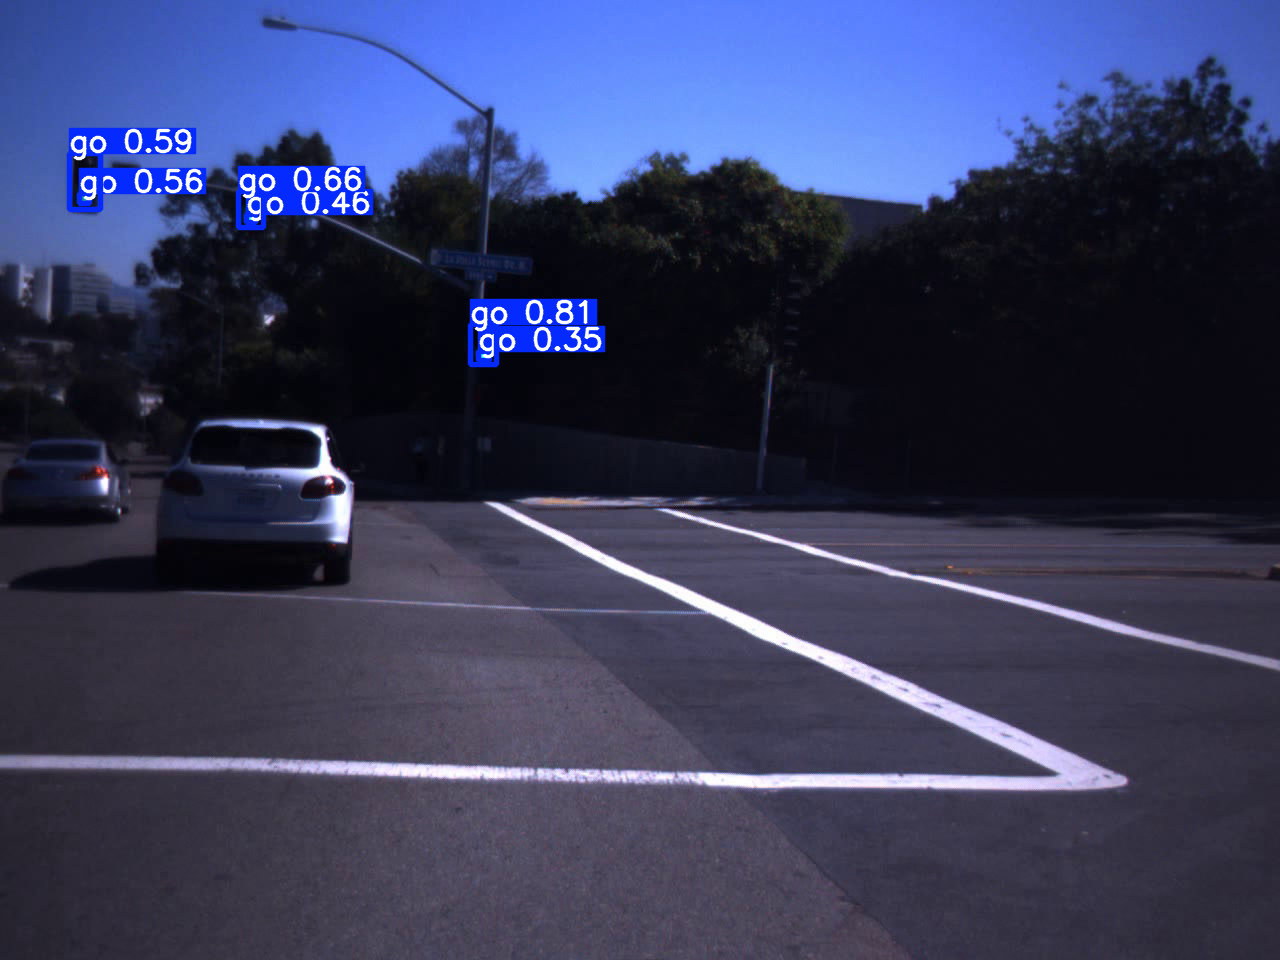

In [ ]:
from ultralytics import YOLO

# Load the model from Google Drive
model = YOLO("/content/drive/MyDrive/yolov8_lisa_models/best_lisa.pt")

# Run prediction on an image
results = model.predict(source="/content/drive/MyDrive/dayClip11--00334.jpg", save=True, imgsz=640)

# View prediction results
results[0].show()



image 1/1 /content/drive/MyDrive/dayClip13--00602.jpg: 480x640 3 gos, 278.5ms
Speed: 9.9ms preprocess, 278.5ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict6


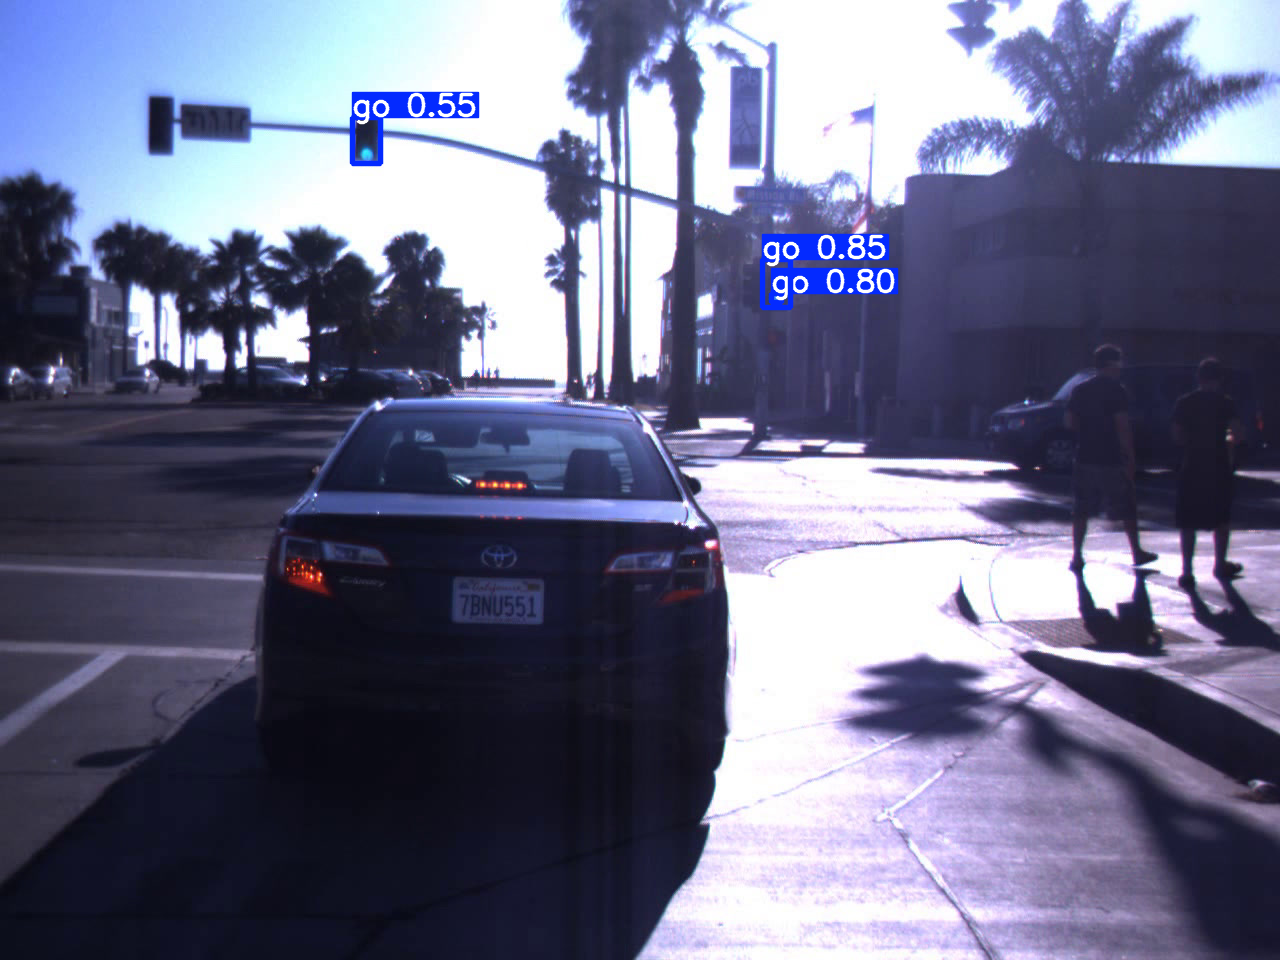

In [ ]:
from ultralytics import YOLO

# Load the model from Google Drive
model = YOLO("/content/drive/MyDrive/yolov8_lisa_models/best_lisa.pt")

# Run prediction on an image
results = model.predict(source="/content/drive/MyDrive/dayClip13--00602.jpg", save=True, imgsz=640)

# View prediction results
results[0].show()


image 1/1 /content/drive/MyDrive/dayClip3--00420.jpg: 480x640 4 stops, 426.7ms
Speed: 9.3ms preprocess, 426.7ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict3


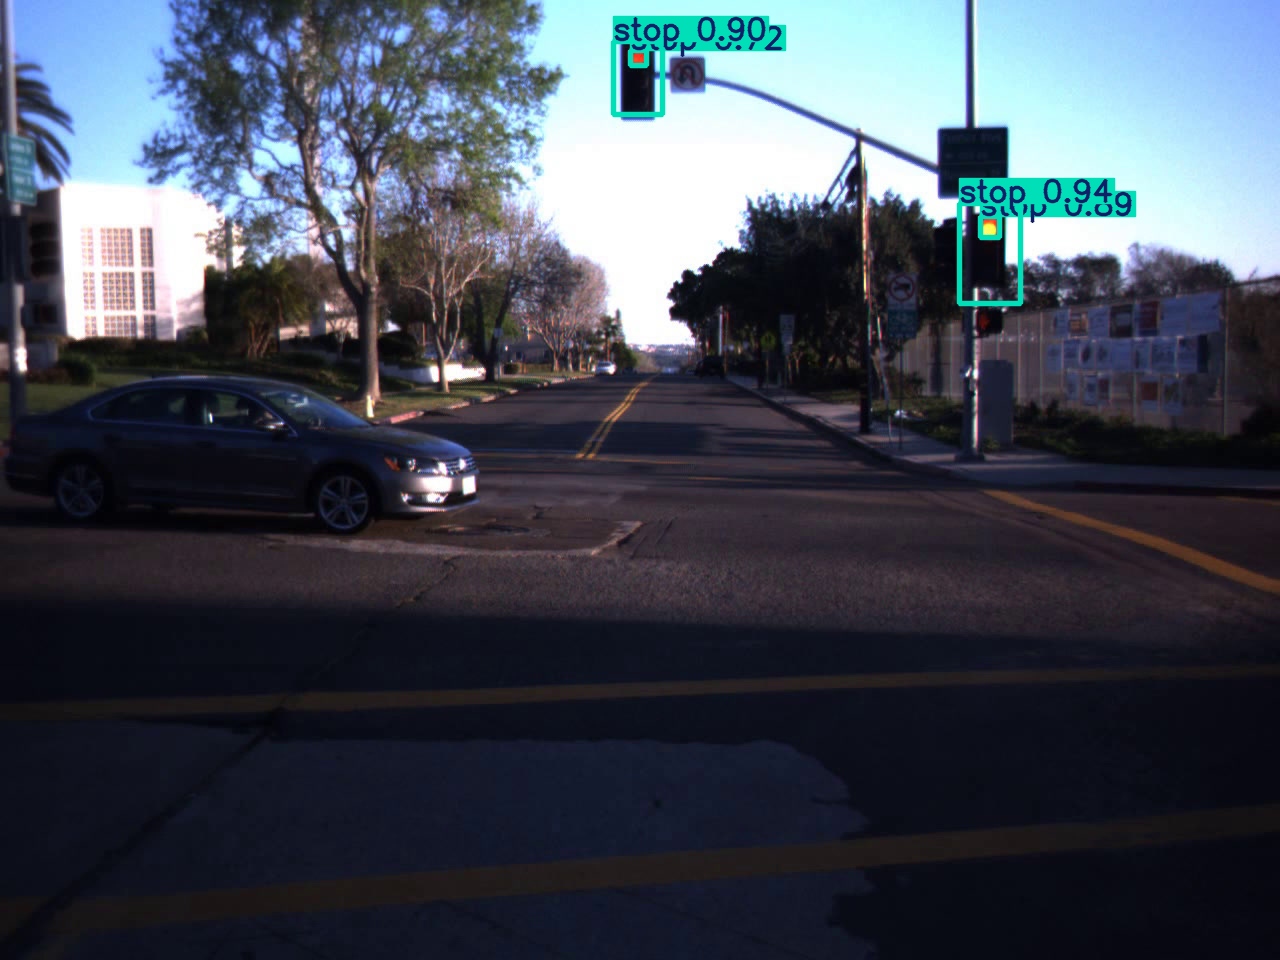

In [ ]:

from ultralytics import YOLO

# Load the model from Google Drive
model = YOLO("/content/drive/MyDrive/yolov8_lisa_models/best_lisa.pt")

# Run prediction on an image
results = model.predict(source="/content/drive/MyDrive/dayClip3--00420.jpg", save=True, imgsz=640)

# View prediction results
results[0].show()


image 1/1 /content/drive/MyDrive/dayClip5--02600.jpg: 480x640 6 gos, 2 goLefts, 173.4ms
Speed: 3.1ms preprocess, 173.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4


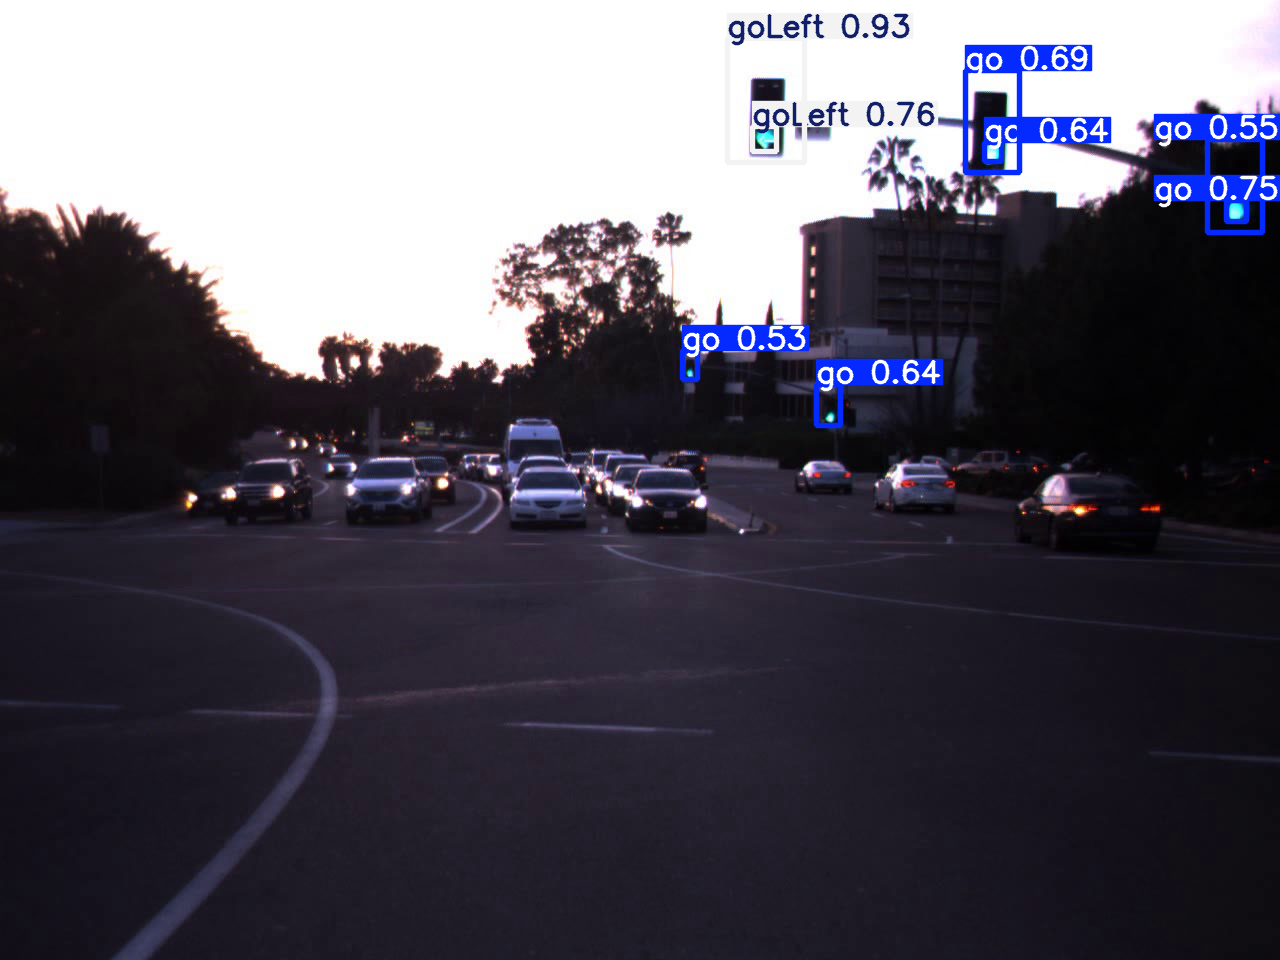

In [ ]:
from ultralytics import YOLO

# Load the model from Google Drive
model = YOLO("/content/drive/MyDrive/yolov8_lisa_models/best_lisa.pt")

# Run prediction on an image
results = model.predict(source="/content/drive/MyDrive/dayClip5--02600.jpg", save=True, imgsz=640)

# View prediction results
results[0].show()


image 1/1 /content/drive/MyDrive/dayClip8--01029.jpg: 480x640 2 gos, 201.1ms
Speed: 10.0ms preprocess, 201.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


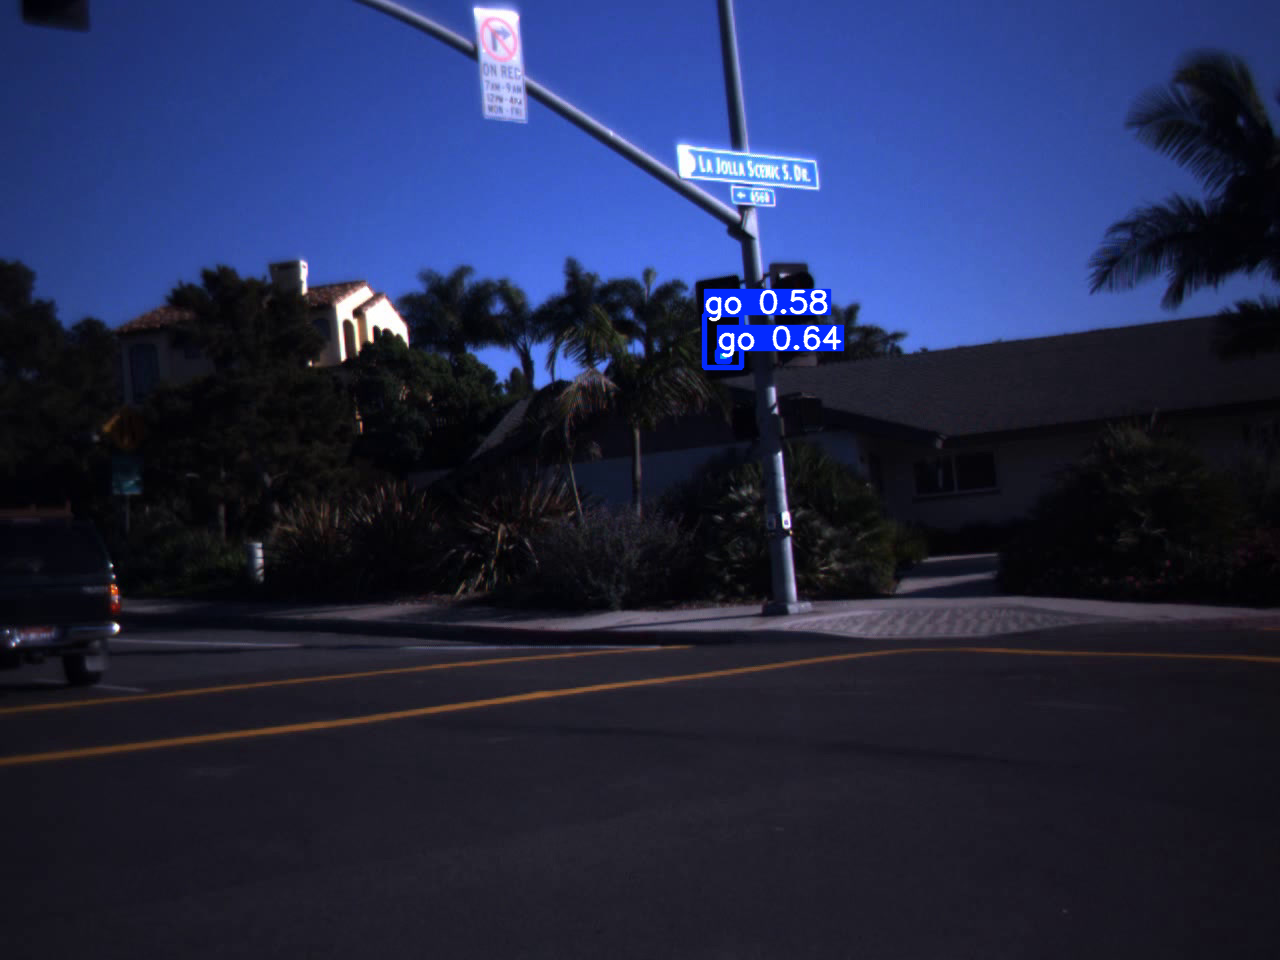

In [ ]:
from ultralytics import YOLO

# Load the model from Google Drive
model = YOLO("/content/drive/MyDrive/yolov8_lisa_models/best_lisa.pt")

# Run prediction on an image
results = model.predict(source="/content/drive/MyDrive/dayClip8--01029.jpg", save=True, imgsz=640)

# View prediction results
results[0].show()